##Импорт библиотек

In [72]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


##Импорт датасета

#####Чтение файлов датасета из директории Github.com

In [ ]:
X_bp = pd.read_excel('https://github.com/Alvas01/BMSTU/blob/main/X_bp.xlsx?raw=true', index_col = 0)
X_nup = pd.read_excel('https://github.com/Alvas01/BMSTU/blob/main/X_nup.xlsx?raw=true', index_col = 0)

#####Вывод первых пяти строк каждого файла датасета, убедимся, что датасет загрузился

In [ ]:
X_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [ ]:
X_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


#####Просмотр общей информации о датасете

In [ ]:
X_bp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [ ]:
X_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   int64  
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 32.5 KB


##Объединение файлов датасета
#####Объединение по индексу, тип объединения INNER

In [ ]:
df = X_bp.join(X_nup, how='inner')

In [ ]:
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


##Разведочный анализ данных

#####Форма объединенного датасета

In [ ]:
df.shape

(1023, 13)

#####Общая информация

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

#####Проверка на наличие пропущенных значений

In [ ]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

#####Наличие уникальных значений

In [ ]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [ ]:
df['Угол нашивки, град'].unique()

array([ 0, 90])

#####Основные статистические характеристики данных

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


#####Гистограммы распределения параметров

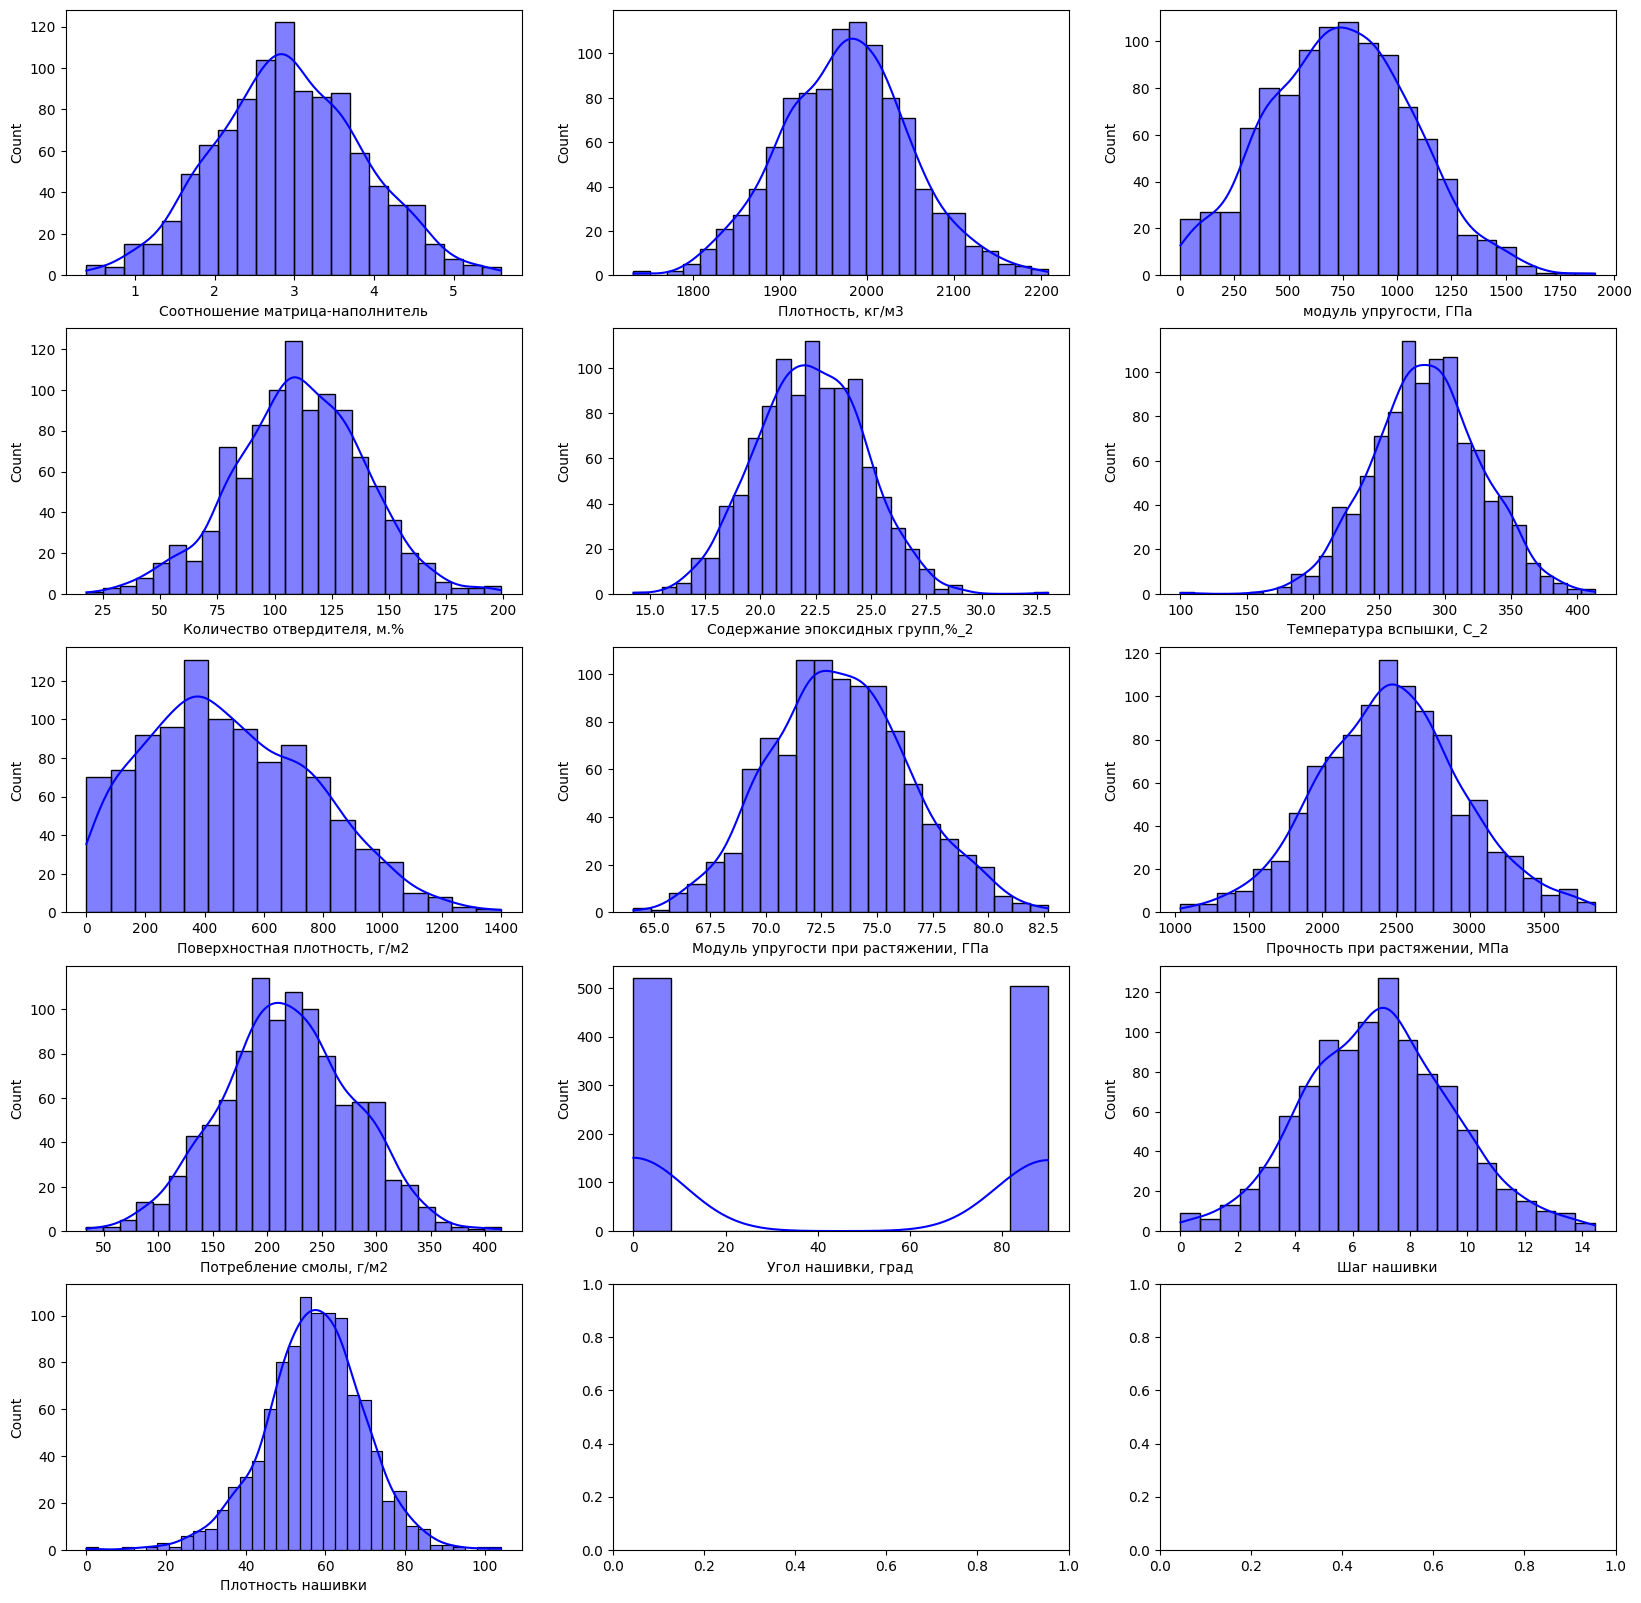

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 20))
for index, column in enumerate(df.columns):
    i, j = divmod(index, 3)
    sns.histplot(data = df[column], ax = axs[i, j], color = 'blue', kde = True)

#####Диаграммы "Ящик с усами"

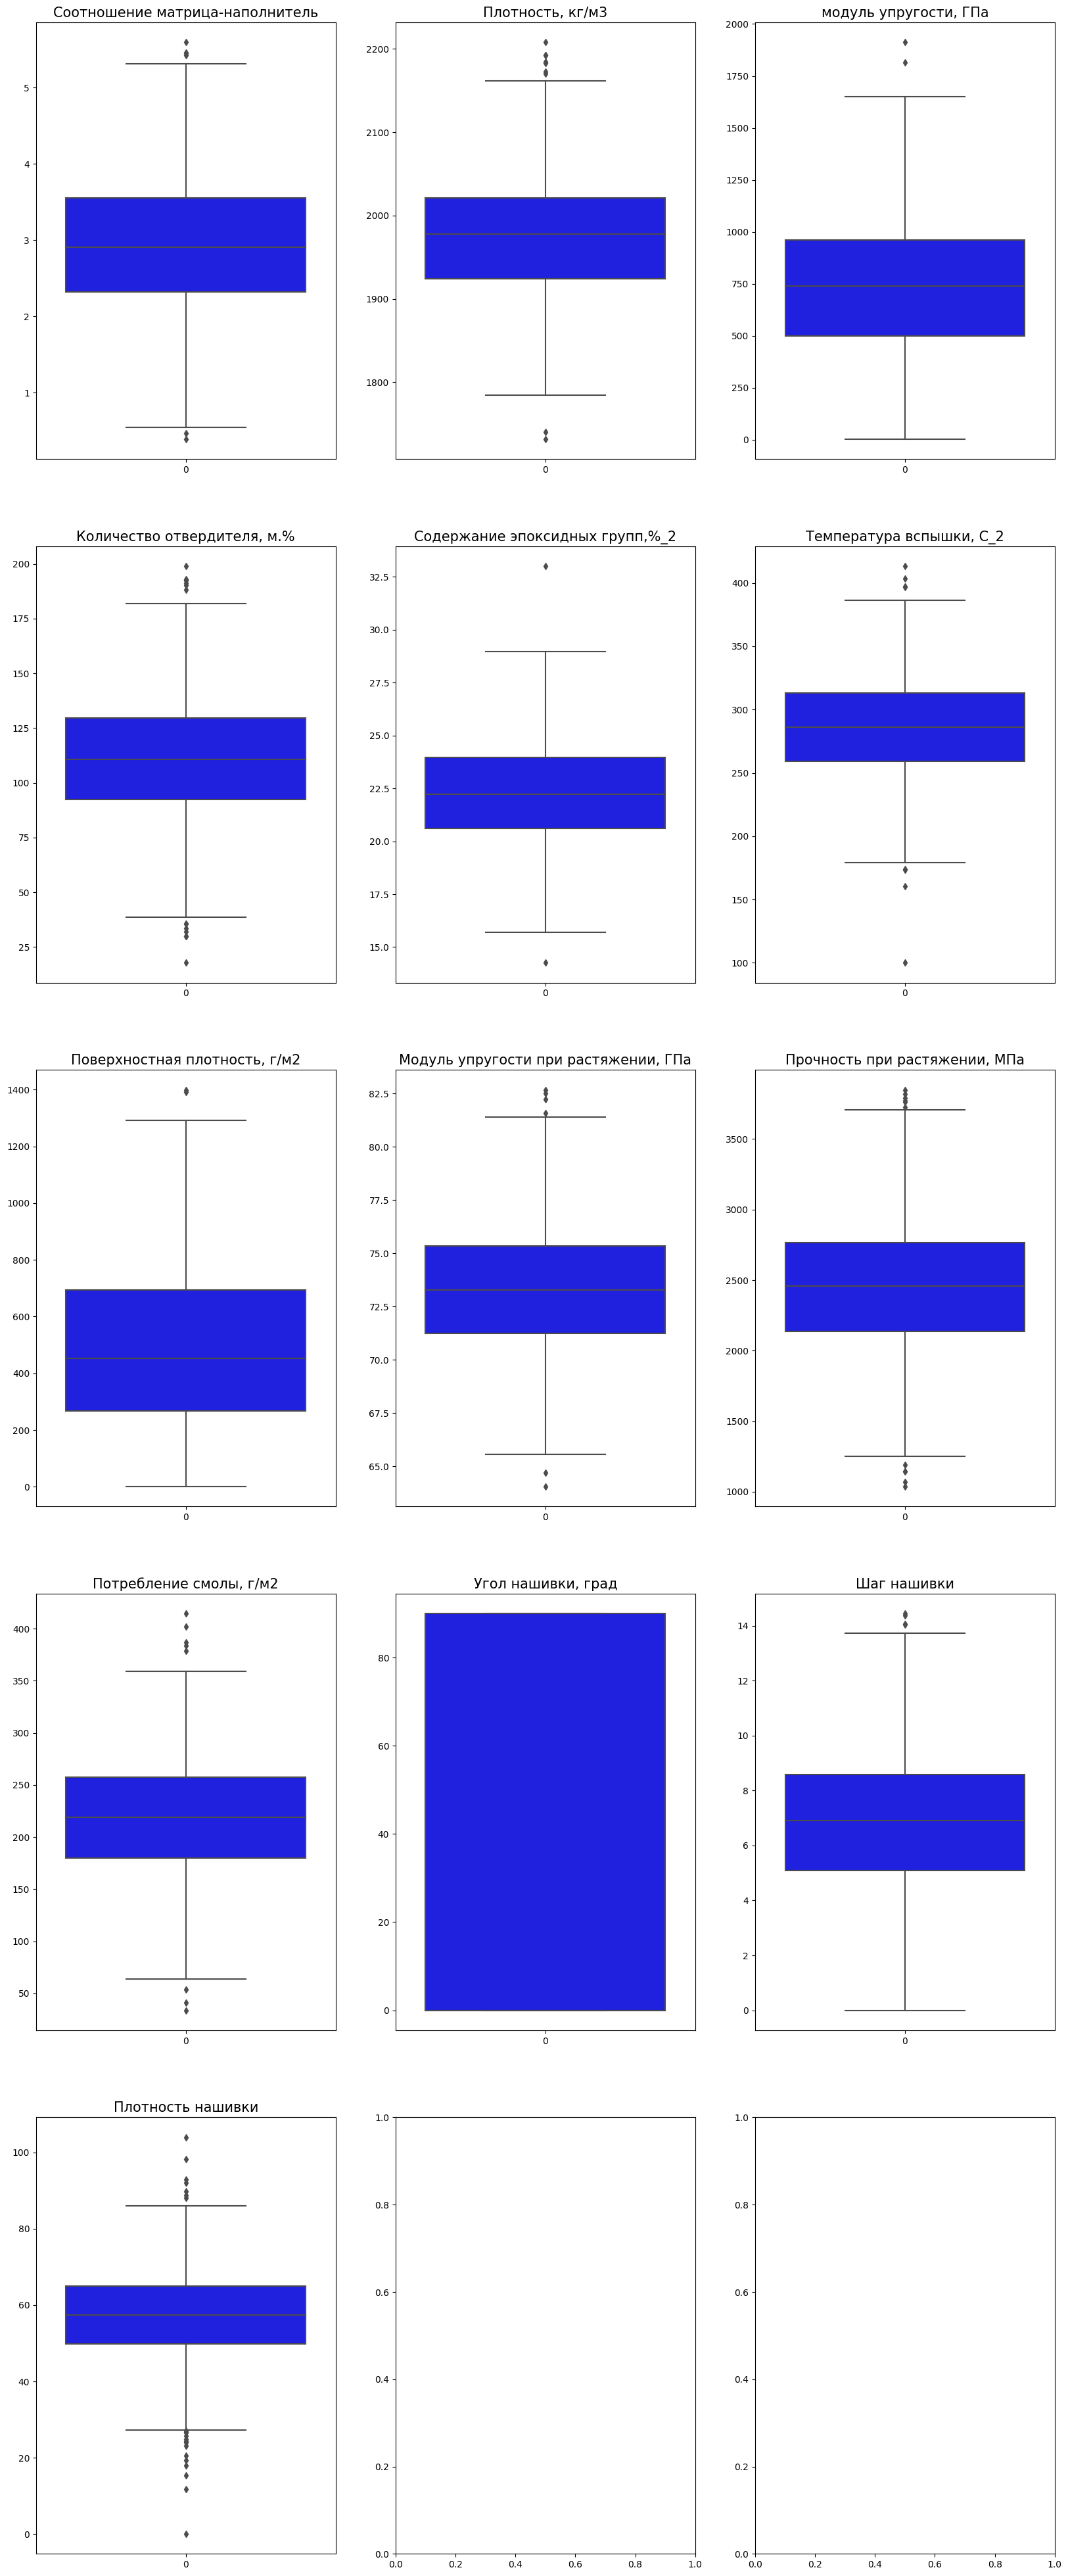

In [ ]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (20, 50))
for index, column in enumerate(df.columns):
    i, j = divmod(index, 3)
    sns.boxplot(data = df[column], ax = axs[i, j], color = 'blue').set_title(column, fontsize = 15)

#####Попарные графики рассеяния точек

In [ ]:
sns.pairplot(df, height = 10)

Output hidden; open in https://colab.research.google.com to view.

#####Корреляция

<Axes: >

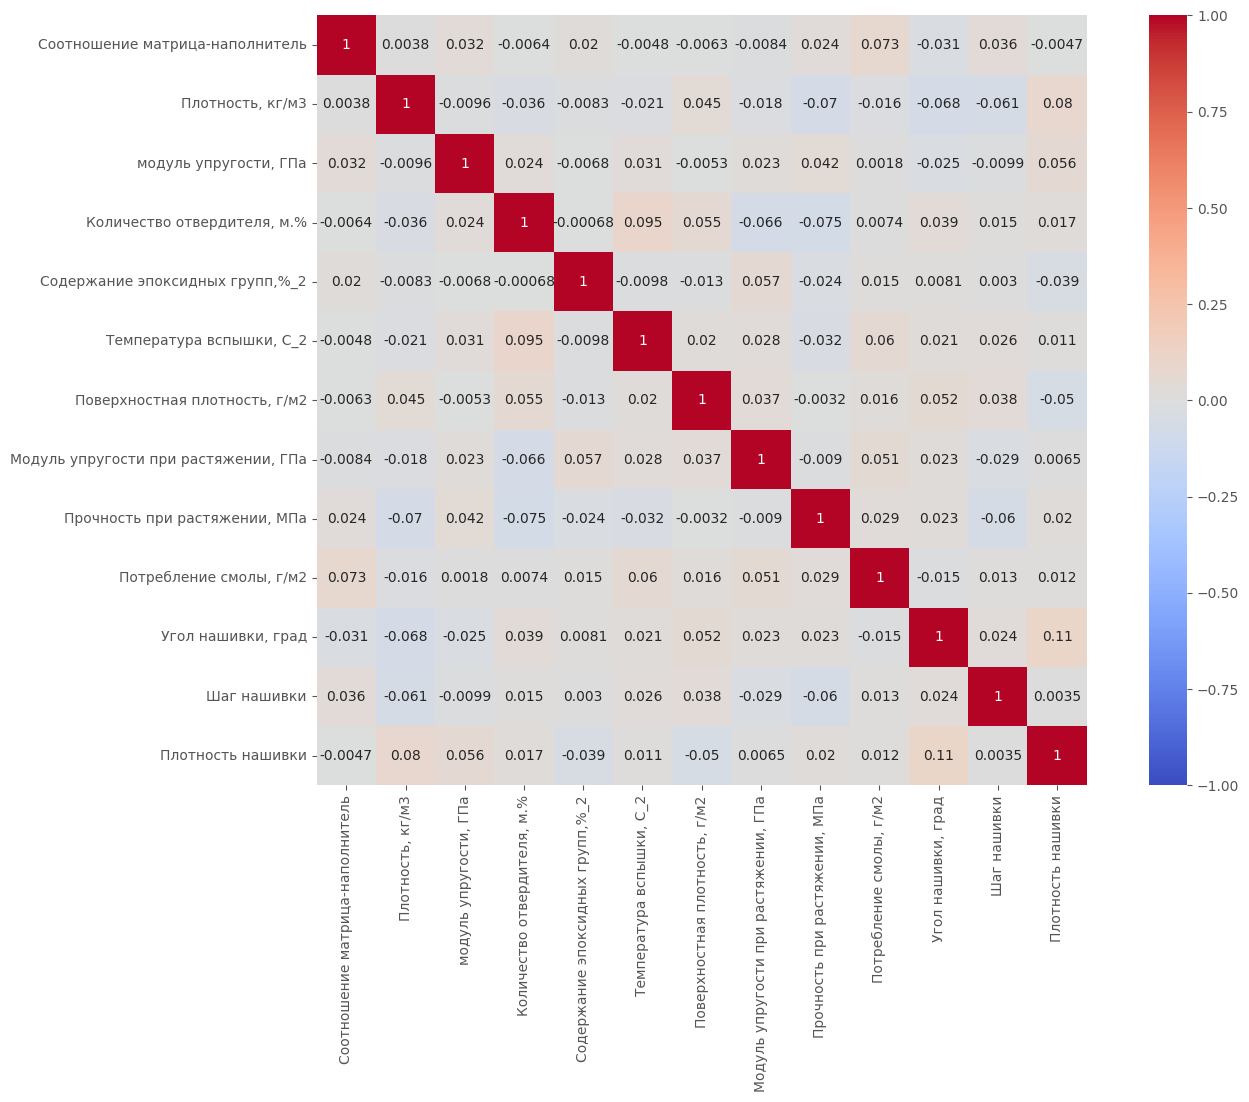

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, center= 0, annot = True, cmap= 'coolwarm', square=True)

##Подготовка данных

#####Подготовка данных состоит из нескольких этапов, таких как обработка недостающих данных, удаление данных, не имеющих статистической значимости, и признаков, находящихся в прямой линейной зависимости, кодирование категориальных признаков, поиск и удаление выбросов (аномалий), разделение датасета на тренировочную и тестирующую части, нормализация или стандартизация данных.
#####Разведочный анализ данных показал, что пустых значений нет, удалять данные не нужно. Параметры соответствуют нормальному распределению, и не коррелируют друг с другом (корреляция близка к 0).
#####Но есть категориальные признаки, выбросы, а также масштаб некоторых признаков различается.

#####Кодирование категориальных данных

In [19]:
# Выше были обнаружены два уникальных значения в параметре "Угол нашивки, град" - 0 и 90. Закодируем их с помощью LabelEncoder.

le = LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])

In [20]:
# Посмотрим, что получилось

df['Угол нашивки, град'].unique()

array([0, 1])

#####Удаление выбросов

In [48]:
# Диаграмма "ящик с усами" выше показал, что во всех параметрах, за исключением "Угол нашивки, град", есть выбросы.
# Для подсчета количества выбросов используем стандартизированную оценку (z-score) и межквартильное расстояние (IQR).

z_score = 0
iqr = 0

for column in df:
    
    z = stats.zscore(df[column])
    z = z.abs() > 3
    print(column, ', z-score: ', z.sum())
    z_score += z.sum()

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr_1 = q3 - q1
    lower = q1 - 1.5 * iqr_1
    upper = q3 + 1.5 * iqr_1
    iqr_r = (df[column] <= lower) | (df[column] >= upper)
    print(column, ', IQR: ', iqr_r.sum())
    iqr += iqr_r.sum()

print('Стандартизированная оценка (z-score), выбросов:', z_score)
print('Межквартильное расстояние (IQR), выбросов:', iqr)

Соотношение матрица-наполнитель , z-score:  0
Соотношение матрица-наполнитель , IQR:  6
Плотность, кг/м3 , z-score:  3
Плотность, кг/м3 , IQR:  9
модуль упругости, ГПа , z-score:  2
модуль упругости, ГПа , IQR:  2
Количество отвердителя, м.% , z-score:  2
Количество отвердителя, м.% , IQR:  14
Содержание эпоксидных групп,%_2 , z-score:  2
Содержание эпоксидных групп,%_2 , IQR:  2
Температура вспышки, С_2 , z-score:  3
Температура вспышки, С_2 , IQR:  8
Поверхностная плотность, г/м2 , z-score:  2
Поверхностная плотность, г/м2 , IQR:  2
Модуль упругости при растяжении, ГПа , z-score:  1
Модуль упругости при растяжении, ГПа , IQR:  6
Прочность при растяжении, МПа , z-score:  0
Прочность при растяжении, МПа , IQR:  11
Потребление смолы, г/м2 , z-score:  3
Потребление смолы, г/м2 , IQR:  8
Угол нашивки, град , z-score:  0
Угол нашивки, град , IQR:  0
Шаг нашивки , z-score:  0
Шаг нашивки , IQR:  4
Плотность нашивки , z-score:  7
Плотность нашивки , IQR:  21
Стандартизированная оценка (z-sco

In [69]:
# Удалим выбросы по методу z-score.

z_score_clean = pd.DataFrame(index = df.index)
for column in df:
    z = stats.zscore(df[column])
    z_score_clean[column] = z.abs() > 3
df_clean = df[z_score_clean.sum(axis=1)==0]

# Посмотрим форму очищенного датасета.
df_clean.shape

(999, 13)

#####Нормализация данных

In [135]:
# Рекомендуется проводить нормализацию данных после их разделения на обучающую (train) и тестовую (test) выборки во избежание их взаимного влияния друг на друга.
# Нормализации подвергаются входные данные (Х)
# Применим метод .fit_transform() класса StandardScaler к обучающей выборке (train), метод .transform() к тестовой выборке.

scaler = StandardScaler()

# Создадим функцию для отображения данных до и после масштабирования.
def statistics_before(data1):
    print('До масштабирования')
    return data1.describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

def statistics_after(data2):
    print('После масштабирования')
    return pd.DataFrame(data2).describe().loc[['min', 'max', 'mean', 'std'], :].style.format(precision=6)

#####Разделение датасета на входные и целевые данные

In [136]:
# Проведём разбиение датасета на входные (Х) и целевые (у) данные в двух вариантах, для каждого целевого параметра.

# Целевой параметр - "Модуль упругости при растяжении, ГПа"
y1 = df_clean.iloc[:, df_clean.columns == 'Модуль упругости при растяжении, ГПа']

# Целевой параметр - "Прочность при растяжении, МПа"
y2 = df_clean.iloc[:, df_clean.columns == 'Прочность при растяжении, МПа']

# Входные параметры
X = df_clean.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])

# Посмотрим форму полученных данных.
print(y1.shape)
print(y2.shape)
print(X.shape)

(999, 1)
(999, 1)
(999, 11)


##Модель машинного обучения для параметра "Модуль упругости при растяжении, ГПа"

#####Деление датасета на обучающую и тестовую выборки

In [141]:
# Разделим данные на train и test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y1, test_size = 0.30, random_state = 42)

#####Масштабирование данных

In [142]:
# масштабируем обучающую выборку
X_train_scaled_1 = scaler.fit_transform(X_train_1)

# используем среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test_scaled_1 = scaler.transform(X_test_1)

In [143]:
# проверим масштабирование
statistics_before(X_train_1)

До масштабирования


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
min,0.389403,1784.482245,2.436909,32.019222,15.695894,173.973907,1.668002,41.048278,0.000000,0.037639,20.571633
max,5.591742,2192.738783,1649.415706,191.053004,28.955094,403.652861,1288.691844,383.663401,1.000000,14.376451,92.963492
mean,2.936529,1974.384866,736.740592,112.237559,22.187505,284.949710,479.506465,216.940706,0.505007,6.812995,57.667783
std,0.910761,73.991275,326.864774,27.228577,2.380725,40.096024,282.388987,58.582546,0.500333,2.555662,11.717408


In [144]:
statistics_after(X_train_scaled_1)

После масштабирования


,0,1,2,3,4,5,6,7,8,9,10
min,-2.798705,-2.568392,-2.248115,-2.948218,-2.728690,-2.769733,-1.693340,-3.004622,-1.010065,-2.653015,-3.168168
max,2.917466,2.953190,2.794210,2.896658,2.844695,2.962592,2.867551,2.847983,0.990035,2.961609,3.014403
mean,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
std,1.000716,1.000716,1.000716,1.000716,1.000716,1.000716,1.000716,1.000716,1.000716,1.000716,1.000716


#####Выбор модели

In [ ]:
# В качестве оценочного параметра используем метрику среднеквадратической ошибки (MSE)
# Функция для определения средеквадратической ошибки
def mse(y_test, y_pred):
    return mean_squared_error(y_test, y_pred) 

# Функция обучения и определения среднеквадратической ошибки по тестовой выборке
def fit_and_evaluate(model):
    
    # Обучение модели
    model.fit(X, y)
    
    # Прогнозирование и расчет ошибки
    model_pred = model.predict(X_test)
    model_mse = mse(y_test, model_pred)
    
    # результат выполнения - рассчитанная ошибка
    return model_mse

In [ ]:
lr = LinearRegression()
lr_mse = fit_and_evaluate(lr)

print('MSE линейной регрессии = %.4f' % lr_mse)

In [ ]:
gradient_boosted = GradientBoostingRegressor(random_state=10)
gradient_boosted_mse = fit_and_evaluate(gradient_boosted)
​
print('MSE градиентного бустинга = %0.4f' % gradient_boosted_mse)

In [ ]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mse = fit_and_evaluate(svm)

print('MSE метода опорных векторов = %0.4f' % svm_mse)

In [ ]:
random_forest = RandomForestRegressor(random_state=10)
random_forest_mse = fit_and_evaluate(random_forest)

print('MSE "случайного леса" = %0.4f' % random_forest_mse)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mse = fit_and_evaluate(knn)

print('MSE регрессии k-ближайших соседей = %0.4f' % knn_mse)